In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os

In [2]:
!mvn clean package > NUL

Página de códigos activa: 1252


In [3]:
def run_java(args):
    JAR_FILE = "target/IPP-TP2-1.0.jar"
    MAIN_CLASS = "matrix.MatrixMain"

    if not os.path.isfile(JAR_FILE):
        print(f"No se encontró {JAR_FILE}")
        print("Compilando con Maven...")
        !mvn clean package
    
    cmd = ["java"] + args.split() + ["-cp", JAR_FILE, MAIN_CLASS]

    result = subprocess.run(cmd, capture_output=True, text=True)

    if result.returncode != 0:
        print("Error al ejecutar Java:", result.stderr)
        return []

    times = [float(line.strip()) for line in result.stdout.splitlines() if line.strip()]
    return times       

In [4]:
size_values = range(500, 2600, 250)
num_threads = 8
times = 3
types = ['sequential', 'parallel', 'fork_join', 'virtual_per_row', 'virtual_per_chunk']

In [5]:
summary = {}

for t in types:
    summary[t] = {}
    for size in size_values:
        if size > 1000 and t == 'sequential':
            continue
        args = f"-Dsize={size} -DnumThreads={num_threads} -Dtimes={times} -Dtype={t}"
        run_times = run_java(args)
        if run_times:
            mean = np.mean(run_times)
            std = np.std(run_times)
            summary[t][size] = {"mean": mean, "std": std}
            if size > 1000:
                print(f"{t} size {size}: mean={mean:.10f} s, std={std:.10f} s")

parallel size 1250: mean=5.7567330333 s, std=0.2619617836 s
parallel size 1500: mean=10.6385779667 s, std=0.0594612246 s
parallel size 1750: mean=18.9432849333 s, std=0.7445901008 s
parallel size 2000: mean=29.0761793000 s, std=0.0447361003 s
parallel size 2250: mean=44.8789414333 s, std=0.5565121570 s
parallel size 2500: mean=72.6296734667 s, std=0.2769627714 s
fork_join size 1250: mean=5.7771594000 s, std=0.0925665821 s
fork_join size 1500: mean=12.8911169667 s, std=0.7991441662 s
fork_join size 1750: mean=20.0480974333 s, std=0.1516463758 s
fork_join size 2000: mean=31.3162792667 s, std=0.0593082857 s
fork_join size 2250: mean=46.4432019667 s, std=3.2620826941 s
fork_join size 2500: mean=79.8197238333 s, std=7.1470366453 s
virtual_per_row size 1250: mean=6.0548315333 s, std=0.1434645315 s
virtual_per_row size 1500: mean=12.1465420667 s, std=0.0702082868 s
virtual_per_row size 1750: mean=20.3037291000 s, std=0.0082335145 s
virtual_per_row size 2000: mean=31.1106564333 s, std=0.124758

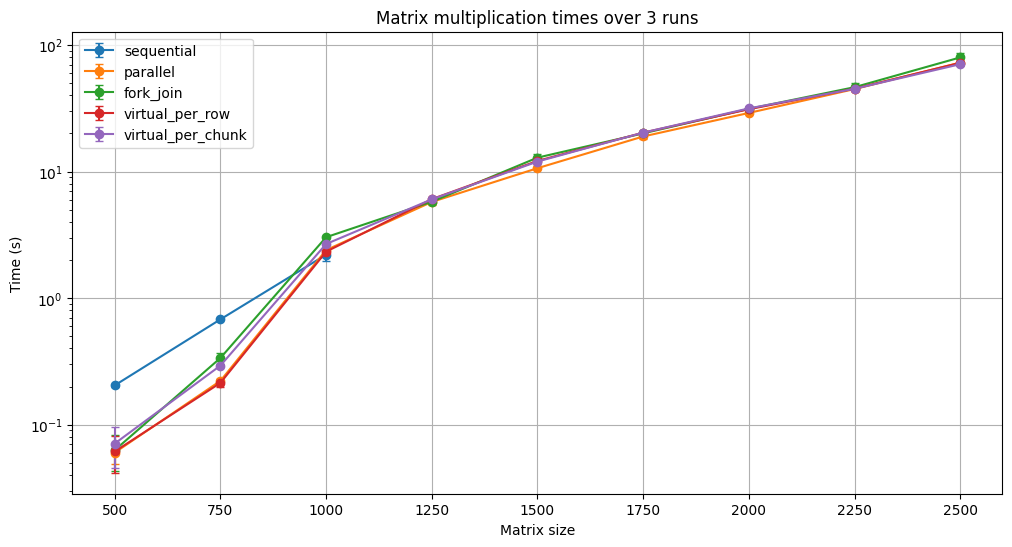

In [6]:
plt.figure(figsize=(12, 6))

for t in types:
    sizes = sorted(summary[t].keys())
    means = [summary[t][s]['mean'] for s in sizes]
    stds = [summary[t][s]['std'] for s in sizes]
    plt.errorbar(sizes, means, yerr=stds, label=t, marker='o', capsize=3)

plt.xticks(range(min(size_values), max(size_values) + 1, 250))
plt.yscale("log")
plt.xlabel("Matrix size")
plt.ylabel("Time (s)")
plt.title(f"Matrix multiplication times over {times} runs")
plt.legend()
plt.grid(True)
plt.show()